In [4]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from data_gen import *
from visualizations import *
from arboreto.utils import load_tf_names
from arboreto.algo import grnboost2


In [27]:
def calculate_tf_scores(network_en,network_raw, tf, target_list):
    tf_en_df =  network_en.loc[((network_en['TF'] == tf)) ]
    tf_raw_df =  network_raw.loc[((network_raw['TF'] == tf))] 
    for item in target_list:
        print(item + " enhancement: ")
        tf_en_df_item =  tf_en_df.loc[((tf_en_df['target'] == item)) ]
        if len(tf_en_df_item)==0:
            print(0)
        else:
            print(tf_en_df_item['importance'])
    
    for item in target_list:
        print(item + " raw: ")
        tf_raw_df_item =  tf_raw_df.loc[((tf_raw_df['target'] == item)) ]
        if len(tf_raw_df_item)==0:
            print(0)
        else:
            print(tf_raw_df_item['importance'])
    
    pass

In [7]:
def network_grn(cluster):
    '''Calculate the gene regulatory network for specific cell type'''
    adata = sc.read("SCN/" + cluster+"_en_cyclum" +".h5ad")
    ge = np.array(adata.X)
    genes = adata.var_names
    df = pd.read_csv("Mus_musculus_TF.txt", '\t')
    list_of_tf = list(df['Symbol'].values)
    list_of_tf = [x for x in list_of_tf if x in adata.var_names]
    print("start")
    network = grnboost2(expression_data=ge,
                            gene_names=genes,  # specify the gene_names
                            tf_names=list_of_tf)
    network.to_csv('SCN/' + cluster + '_netowrk_en_cyclum_tf.csv')  
    print("en done")
    adata = sc.read("SCN/" + cluster+"_raw_cyclum" +".h5ad")
    ge = np.array(adata.X)
    genes = adata.var_names
    list_of_tf = list(df['Symbol'].values)
    list_of_tf = [x for x in list_of_tf if x in adata.var_names]
    network = grnboost2(expression_data=ge,
                            gene_names=genes,  # specify the gene_names
                            tf_names=list_of_tf)
    network.to_csv('SCN/' + cluster + '_netowrk_raw_cyclum_tf.csv')  
    print(cluster + " done")
    pass


In [10]:
network_grn('Astrocytes')

/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """Entry point for launching an IPython kernel.


start
en done
Astrocytes done


In [9]:
network_grn('Ependymal')

start


/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """Entry point for launching an IPython kernel.
distributed.nanny - WARNING - Worker process still alive after 3.998556709289551 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.999995040893555 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.9999975204467777 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.9999961853027344 seconds, killing


en done


distributed.nanny - WARNING - Worker process still alive after 3.9994033813476566 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.9999982833862306 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.9999990463256836 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.999998474121094 seconds, killing


Ependymal done


In [8]:
network_grn('Endothelial')

start


/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """Entry point for launching an IPython kernel.


en done
Endothelial done


In [38]:
network_grn('NG2')

/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """Entry point for launching an IPython kernel.


start
en done


distributed.nanny - WARNING - Worker process still alive after 3.9999799728393555 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.999998664855957 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.9999975204467777 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.999998474121094 seconds, killing


NG2 done


In [40]:
network_grn('SCN Neurons')

/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """Entry point for launching an IPython kernel.


start


/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53858 instead
  f"Port {expected} is already in use.\n"
distributed.nanny - WARNING - Worker process still alive after 3.9994184494018556 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.9999982833862306 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.999999237060547 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.9999990463256836 seconds, killing


en done


/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62298 instead
  f"Port {expected} is already in use.\n"
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)


TimeoutError: timed out after 60 s.

In [42]:
cluster= 'SCN Neurons'
df = pd.read_csv("Mus_musculus_TF.txt", '\t')
adata = sc.read("SCN/" + cluster+"_raw_cyclum" +".h5ad")
ge = np.array(adata.X)
genes = adata.var_names
list_of_tf = list(df['Symbol'].values)
list_of_tf = [x for x in list_of_tf if x in adata.var_names]
network = grnboost2(expression_data=ge,
                            gene_names=genes,  # specify the gene_names
                            tf_names=list_of_tf)
network.to_csv('SCN/' + cluster + '_netowrk_raw_cyclum_tf.csv')  
print(cluster + " done")


/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 59919 instead
  f"Port {expected} is already in use.\n"
distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_per

TimeoutError: timed out after 60 s.

In [30]:
cluster = 'Ependymal'
network_en = pd.read_csv('SCN/' + cluster + '_netowrk_en_cyclum_tf.csv')  
network_raw = pd.read_csv('SCN/' + cluster + '_netowrk_raw_cyclum_tf.csv')  

In [31]:
calculate_tf_scores(network_en=network_en ,network_raw=network_raw, tf='Rorc', target_list=['Kif21a', 'Ahsa2', 'Hsp90ab1','Mt1'])

Kif21a enhancement: 
274988    1.067041
Name: importance, dtype: float64
Ahsa2 enhancement: 
338190    0.598849
Name: importance, dtype: float64
Hsp90ab1 enhancement: 
514351    0.132552
Name: importance, dtype: float64
Mt1 enhancement: 
636366    0.002736
Name: importance, dtype: float64
Kif21a raw: 
0
Ahsa2 raw: 
0
Hsp90ab1 raw: 
0
Mt1 raw: 
693927    0.226035
Name: importance, dtype: float64


In [33]:
cluster = 'Ependymal'
adata_raw = sc.read("SCN/" + cluster+"_raw_cyclum" +".h5ad")
adata_en = sc.read("SCN/" + cluster+"_en_cyclum" +".h5ad")


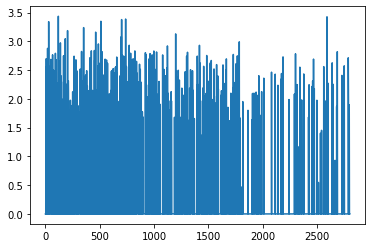

In [36]:
plt.plot(adata_raw[:,'Ahsa2'].X)

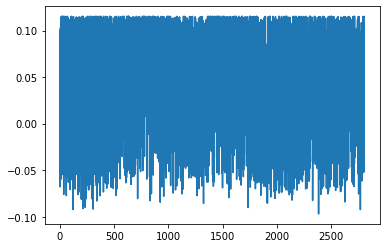

In [37]:
plt.plot(adata_en[:,'Ahsa2'].X)